In [1]:
%matplotlib widget
import numpy as np
import json, os, glob
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

# Load mono scan

In [2]:
pgroup = 'p21992'

runlist = np.arange(63, 73)
runlist = [103, 105]

##############################################
from textwrap import wrap
from sfdata import SFScanInfo
jsonlist = []
for run in runlist:
    jsonfile = ''
    jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    jsonlist.append(jsonfile)
print ("will reduce {} run(s): {}".format(len(jsonlist), runlist))
titlestring = pgroup + ' --- ' +str(runlist)
jsonlist

will reduce 2 run(s): [103, 105]


['/sf/alvra/data/p21992/raw/run0103-MbCO_XANES_500fs/meta/scan.json',
 '/sf/alvra/data/p21992/raw/run0105-MbCO_XANES_500fs/meta/scan.json']

In [3]:
channel_diode_1 = 'SARES12-GES1:PR1_CH1_VAL_GET'
channel_diode_2 = 'SARES12-GES1:PR1_CH2_VAL_GET'

/sf/alvra/data/p21992/raw/run0105-MbCO_XANES_500fs/meta/scan.json
Step 13 of 13: Processing acq0013

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet         1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS  992 / 1001 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES12-GES1:PR1_CH1_VAL_GET    1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES12-GES1:PR1_CH2_VAL_GET    1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY       1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 992 / 1001 -> 1% loss
complete channels: 4 / 5 -> 20% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 486 pump and 486 unpump shots
correlation Diode1 (dark shots) = 0.9962867722690131
correlation Diode2 (dark shots) = 0.9957473217070768
----------------------------
Loaded 12699 total shots


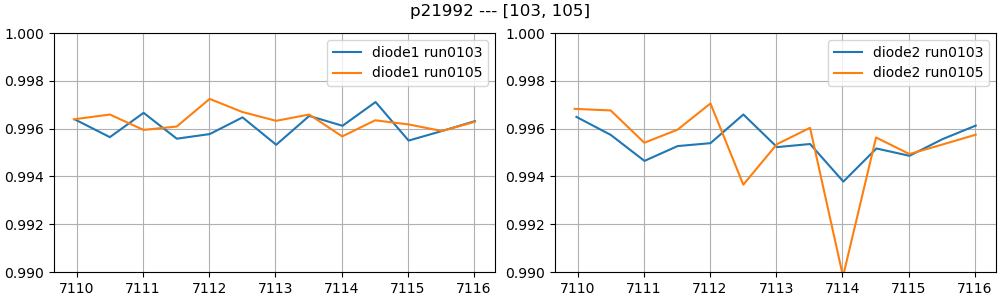

In [4]:
detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

reducedir='/sf/alvra/data/{}/work/Reduced_data/All_shots/'.format(pgroup)
saveflag = True


unpump_1, unpump_2, Izero_unpump, energy, readbacks, corr1, corr2 = \
XAS_scan_static(reducedir, saveflag, jsonlist, detector_XAS_1, detector_XAS_2, detector_Izero)

Plot_correlations(pgroup, reducedir, runlist, timescan=False)#, lowlimit = 0.5)

25 13 26


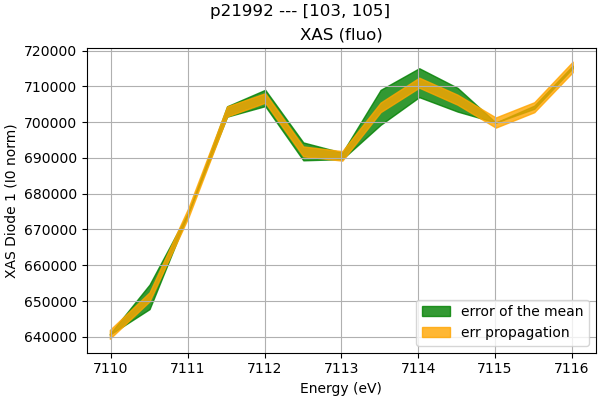

In [5]:
quantile = 0.8

rbk = readbacks[0]
GS, err_GS, err_GS2 = rebin_XAS_static(unpump_1, Izero_unpump, energy, rbk, quantile)

fig, (ax1) = plt.subplots(figsize=(6, 4), constrained_layout=True)
plt.suptitle(titlestring)

ax1.fill_between(rbk, GS-err_GS2, GS+err_GS2, label='error of the mean',color='green', alpha = 0.8)
ax1.fill_between(rbk, GS-err_GS, GS+err_GS, label='err propagation',color='orange', alpha = 0.8)
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="lower right")
ax1.grid()

plt.show()
